# What is the optimal skill to learn for data Analyst?

### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent.

In [1]:
#Importing Libraries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HP\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_US=df_DA_US.dropna(subset=["salary_year_avg"])
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [3]:
df_explode = df_DA_US.explode('job_skills')
df_DA_skills = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count' : 'skills_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US) #counts the number of job_postings

df_DA_skills['skill_percent'] = df_DA_skills['skills_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skills_count'] > 0]

df_DA_skills

,skills_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [6]:
skill_limit = 5

df_DA_US_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_US_high_demand

,skills_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


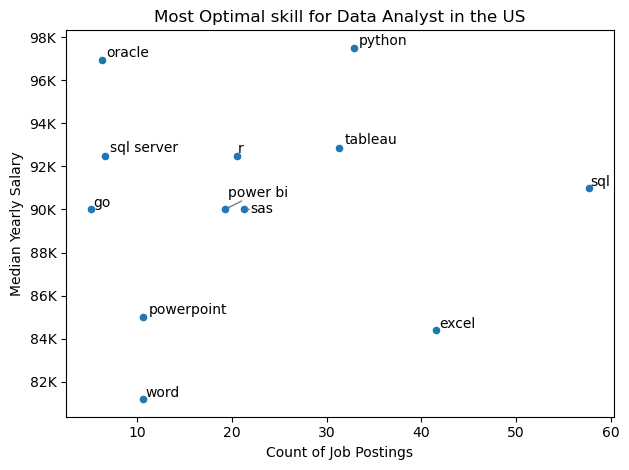

In [9]:
df_DA_US_high_demand.plot(kind="scatter", x = "skill_percent", y="median_salary")

from adjustText import adjust_text

texts = []
for i, txt in enumerate(df_DA_US_high_demand.index):
    texts.append(plt.text(df_DA_US_high_demand["skill_percent"].iloc[i], df_DA_US_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops= dict(arrowstyle= '->', color = "gray"))

ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y/1000)}K"))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal skill for Data Analyst in the US')
plt.tight_layout()
plt.show()

In [10]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['qlik',
  'msaccess',
  'microstrategy',
  'nuix',
  'datarobot',
  'powerpoint',
  'visio',
  'tableau',
  'sheets',
  'esquisse',
  'spss',
  'ssis',
  'cognos',
  'sharepoint',
  'splunk',
  'alteryx',
  'sas',
  'power bi',
  'outlook',
  'ssrs',
  'looker',
  'excel',
  'ms access',
  'spreadsheet',
  'powerbi',
  'sap',
  'dax',
  'word'],
 'programming': ['visual basic',
  'lisp',
  'r',
  'solidity',
  'haskell',
  'elixir',
  'pascal',
  'mongo',
  'dart',
  'cobol',
  'julia',
  'javascript',
  'clojure',
  'typescript',
  'nosql',
  'assembly',
  'rust',
  'crystal',
  'html',
  'vba',
  'perl',
  'mongodb',
  'sql',
  'kotlin',
  'fortran',
  'no-sql',
  'ocaml',
  'vb.net',
  't-sql',
  'bash',
  'shell',
  'sas',
  'sass',
  'delphi',
  'erlang',
  'css',
  'f#',
  'c#',
  'matlab',
  'go',
  'powershell',
  'apl',
  'visualbasic',
  'scala',
  'php',
  'groovy',
  'swift',
  'python',
  'ruby',
  'java',
  'golang',
  'objective-c',
  'c',
  'c++',
  '

In [11]:
df_technology =pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')
df_technology



,technology,skills
0,analyst_tools,qlik
0,analyst_tools,msaccess
0,analyst_tools,microstrategy
0,analyst_tools,nuix
0,analyst_tools,datarobot
...,...,...
9,sync,mattermost
9,sync,slack
9,sync,wire
9,sync,google chat


In [12]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_DA_skills_tech

,skills_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


In [15]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent' ]> skill_limit]

df_DA_skills_tech_high_demand 

,skills_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


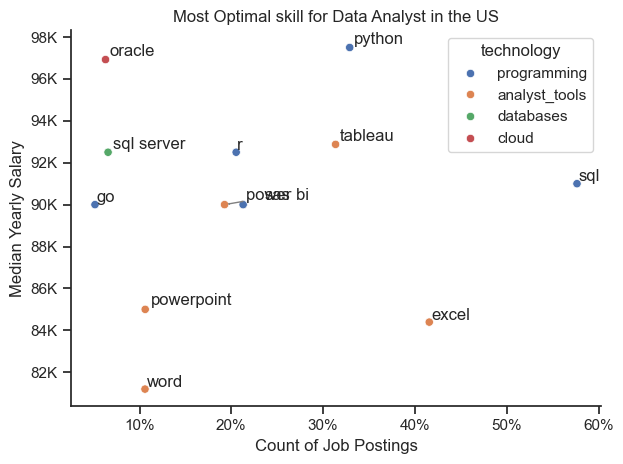

In [20]:
sns.scatterplot(data=df_DA_skills_tech_high_demand, x = "skill_percent", y="median_salary", hue= 'technology')

from adjustText import adjust_text

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_US_high_demand.index):
    texts.append(plt.text(df_DA_US_high_demand["skill_percent"].iloc[i], df_DA_US_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops= dict(arrowstyle= '->', color = "gray"))
from matplotlib.ticker import PercentFormatter

ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal skill for Data Analyst in the US')
plt.legend(title='technology')
plt.tight_layout()
plt.show()